# Investigating the topics in SFA lyrics by Album

LDA Topic analysis by album.

In [4]:
import pandas as pd
import textacy
import spacy
import string
import re
from spacy.lang.en.stop_words import STOP_WORDS


from spacy_pipeline_functions import remove_parts, remove_stopwords


from os import path
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

nlp = spacy.load('en')
% matplotlib inline

Load the lyrics of all english language songs from a studio album. Also crteate a 'metadata' string - basiclly a string representation of json or dict that we will use later to identify each song as it is transformed into a spaCy doc.

In [5]:
lyrics = pd.read_csv("data/SFALyrics_p.csv", dtype=str)
#lyrics['lyrics'] = lyrics['lyrics'].replace('\n',' ', regex=True)
lyrics['lyrics'] = lyrics['lyrics'].str.lower()
lyrics['metadata'] = '{"title": "' + lyrics['title'] + '" ,"album":"' + lyrics['album'] + '"}'

lyrics.head()

,Unnamed: 0,lyrics,title,album,metadata
0,0,i had a soul transplant operation \ncoz my byp...,God! How me magic,Fuzzy Logic,"{""title"": ""God! How me magic"" ,""album"":""Fuzzy ..."
1,1,"[bunf:] \nhamster, turnin' round in your wheel...",Fuzzy Birds,Fuzzy Logic,"{""title"": ""Fuzzy Birds"" ,""album"":""Fuzzy Logic""}"
2,2,"first time, i did it for the hell of it \nstuc...",Something 4 the weekend,Fuzzy Logic,"{""title"": ""Something 4 the weekend"" ,""album"":""..."
3,3,locked in a sorry dream \nyou know we're drown...,Frisbee,Fuzzy Logic,"{""title"": ""Frisbee"" ,""album"":""Fuzzy Logic""}"
4,4,i was lost \nlost on the bypass road \ncould b...,Hometown Unicorm,Fuzzy Logic,"{""title"": ""Hometown Unicorm"" ,""album"":""Fuzzy L..."


## Pre-process text

In [6]:
nlp.pipeline

[('tagger', <spacy.pipeline.Tagger at 0x1a2aefe278>),
 ('parser', <spacy.pipeline.DependencyParser at 0x1a12e26888>),
 ('ner', <spacy.pipeline.EntityRecognizer at 0x1a12e269e8>)]

In [7]:
nlp.add_pipe(remove_parts, 'rm_parts',  after ='tagger')

In [8]:
nlp.pipeline

[('tagger', <spacy.pipeline.Tagger at 0x1a2aefe278>),
 ('rm_parts',
  <function spacy_pipeline_functions.remove_parts(doc, stop=True, punct=True, space=True, num=True, digit=True, currency=True, url=True, email=True)>),
 ('parser', <spacy.pipeline.DependencyParser at 0x1a12e26888>),
 ('ner', <spacy.pipeline.EntityRecognizer at 0x1a12e269e8>)]

Lets have a look customising the stopword list

In [9]:
nlp.vocab["be"].is_stop = True
nlp.vocab["are"].is_stop = True
nlp.vocab["go"].is_stop = True
nlp.vocab["will"].is_stop = True
nlp.vocab["\n"].is_stop = True
nlp.vocab["'re"].is_stop = True
nlp.vocab["n't"].is_stop = True
nlp.vocab[""].is_stop = True

Now, lets create a spaCy doument from each song lyric

In [10]:
lyrics['doc'] = lyrics['lyrics'].apply(nlp)
lyrics.head()

,Unnamed: 0,lyrics,title,album,metadata,doc
0,0,i had a soul transplant operation \ncoz my byp...,God! How me magic,Fuzzy Logic,"{""title"": ""God! How me magic"" ,""album"":""Fuzzy ...","(soul, transplant, operation, coz, bypass, fun..."
1,1,"[bunf:] \nhamster, turnin' round in your wheel...",Fuzzy Birds,Fuzzy Logic,"{""title"": ""Fuzzy Birds"" ,""album"":""Fuzzy Logic""}","(bunf, hamster, turnin, round, wheel, 've, got..."
2,2,"first time, i did it for the hell of it \nstuc...",Something 4 the weekend,Fuzzy Logic,"{""title"": ""Something 4 the weekend"" ,""album"":""...","(time, hell, stuck, tongue, swallowed, second,..."
3,3,locked in a sorry dream \nyou know we're drown...,Frisbee,Fuzzy Logic,"{""title"": ""Frisbee"" ,""album"":""Fuzzy Logic""}","(locked, sorry, dream, know, drowning, designe..."
4,4,i was lost \nlost on the bypass road \ncould b...,Hometown Unicorm,Fuzzy Logic,"{""title"": ""Hometown Unicorm"" ,""album"":""Fuzzy L...","(lost, lost, bypass, road, worse, turned, toad..."


In [11]:
sents = list(lyrics['doc'][0].sents)
sents[0]

soul transplant operation coz bypass function 'm keeping toes til man

## Create a corpus
A corpus is an ordered collection of textacy Docs, all processed by the same spacy language pipeline. We can convert our dataframe of documents into a corpus, using our json string as metadata.

Album: Dark Days/Light Years
topic 0 : day, well, have, future, oh, town, feel, stone, start, light
topic 1 : shit, pirate, run, bring, have, be, fun, get, rain, town
topic 2 : 'cos, think, start, killer, da, well, like, be, play, have
topic 3 : look, come, small, fuck, oh, foot, ring, get, have, ship
topic 4 : 'cos, eye, get, have, night, away, light, stone, ship, like
0 0.13014425455451722
1 0.34010682661916986
2 0.27113394238518873
3 0.13300734572928494
4 0.1256076307118392


Album: Fuzzy Logic
topic 0 : nice, need, mind, know, rest, get, scream, round, time, coz
topic 1 : oh, buy, yes, pass, need, lie, round, have, find, gather
topic 2 : man, gather, will, away, lose, look, aim, infinity, come, have
topic 3 : la, god, mind, wo, lose, day, bypass, long, find, turn
topic 4 : round, yes, find, day, lie, come, long, play, til, aim
0 0.24390487074472858
1 0.17943939939771172
2 0.1819590600874843
3 0.3257992310625874
4 0.06889743870748799


Album: Guerilla
topic 0 : la, turn, close, need

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)




Album: Hey! Venus
topic 0 : away, place, turn, have, face, leave, look, tell, sun, find
topic 1 : night, away, sun, leave, bring, rise, look, turn, find, tell
topic 2 : song, bring, have, rise, place, leave, turn, find, look, away
topic 3 : rise, tell, have, find, night, song, away, face, look, place
topic 4 : bring, have, place, night, find, song, tell, away, turn, leave
0 0.40313203750201176
1 0.17541327285271807
2 0.16641154375076947
3 0.18316785316448242
4 0.07187529273001834


Album: Love Kraft
topic 0 : girl, away, land, life, go, have, angle, poise, human, sleep
topic 1 : friend, go, long, home, time, old, inside, dark, till, beam
topic 2 : will, beam, shine, have, fear, human, friend, thing, time, say
topic 3 : kiss, take, sky, away, move, angle, fee, cry, circle, foot
topic 4 : walk, twinkle, rock, home, feel, come, find, take, count, let
0 0.11957389342949712
1 0.2511102665178659
2 0.18900205875002304
3 0.12272714043693278
4 0.3175866408656811


Album: Phantom Power
topic 0

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)




Album: Radiator
topic 0 : different, river, slowly, will, go, come, station, lie, be, have
topic 1 : people, space, will, one, choose, lie, come, live, turn, numb
topic 2 : free, come, say, will, leave, lose, way, friend, heavy, have
topic 3 : have, tell, like, think, get, make, play, different, coz, feel
topic 4 : know, need, get, line, coz, heavy, go, have, people, space
0 0.1346629146514851
1 0.2702168738368035
2 0.18842581699860186
3 0.27615081870089936
4 0.13054357581221016


Album: Rings around the World
topic 0 : feeling, die, come, have, stay, people, friend, not, tear, away
topic 1 : know, sun, would, leave, come, fall, way, shoulder, far, peace
topic 2 : turn, world, have, away, asleep, fall, like, far, let, old
topic 3 : be, will, break, time, stay, old, space, give, stop, friend
topic 4 : world, not, have, get, people, hate, be, late, wish, well
0 0.1806369209091856
1 0.39165734011140785
2 0.12517809904569555
3 0.12531718920672066
4 0.17721045072699024




/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


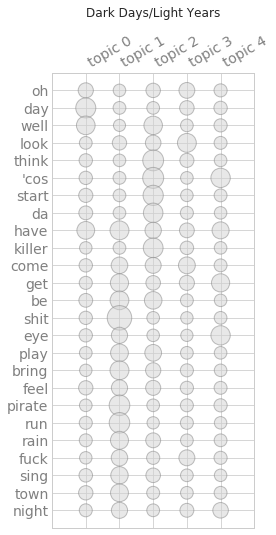

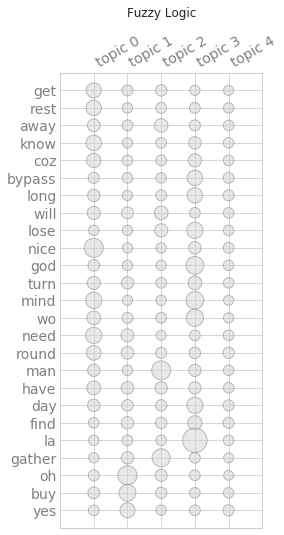

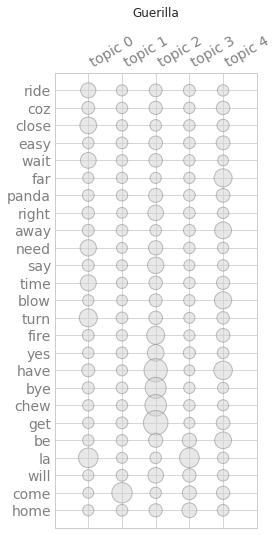

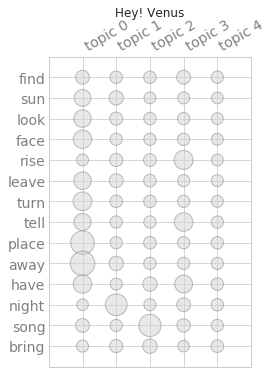

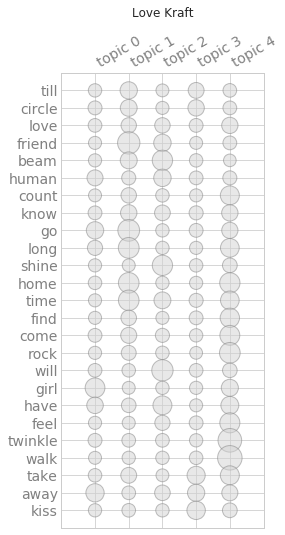

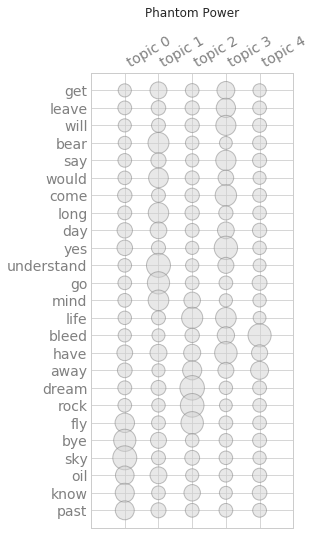

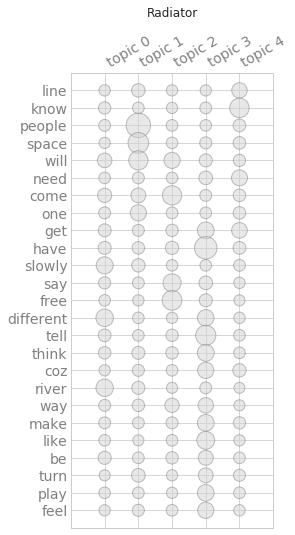

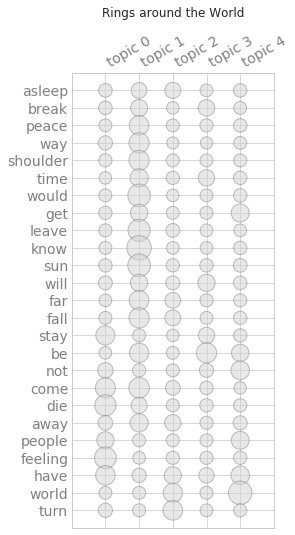

In [12]:

albums2 = lyrics.groupby('album')
#for key, item in albums2:
    #print(albums2.get_group(key),  "\n\n")

for key, album in albums2:
    print("Album:" , key)

    corpus = textacy.Corpus(nlp, docs=list(album.doc), metadatas= list(album.metadata))
    
    vectorizer = textacy.Vectorizer(
    tf_type='linear', apply_idf=True, idf_type='smooth', norm='l2',
    min_df=2, max_df=0.95)
    
    doc_term_matrix = vectorizer.fit_transform(
    (doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True)
        for doc in corpus))
    
    model = textacy.tm.TopicModel('lda', n_topics=5)
    model.fit(doc_term_matrix)
    
    doc_topic_matrix = model.transform(doc_term_matrix)
    for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term):
         print('topic', topic_idx, ':', ', '.join(top_terms))
            
    for i, val in enumerate(model.topic_weights(doc_topic_matrix)):
         print(i, val)
       

    plt = model.termite_plot(doc_term_matrix, vectorizer.id_to_term,
                   topics=-1,  n_terms=25, sort_terms_by='seriation')
    plt.set_title(key, y = 1.11) 
    print('\n')